# Задача - кластеризовать зачекиненных пользователей сервиса

**Вам следует:**
1. Взять checkins.csv.
2. Подготовить данные к кластеризации.
3. Кластеризовать через K-means.
4. Подобрать оптимальное количество кластеров методом "локтя".
5. Посмотреть на визуализацию кластеризации и попробовать её интерпретировать.
6. Кластеризовать иерархической агломеративной кластеризацией (Agglomerative).
7. Подобрать такой уровень в иерархии, на котором образуется такое же количество кластеров, как и в п.4.
8. Посмотреть, как пересекаются кластеры K-means и Agglomerative.

In [3]:
import pandas as pd    
import numpy as np     

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

%matplotlib inline

from sklearn.cluster import AgglomerativeClustering, KMeans

**Что в checkins.csv?**

Это датасет чекинов пользователей сервиса Foursquare.
Там лежат id наблюдений, id тех, кто зачекинился, время чекина, ещё какое-то id и координаты чекина. Именно координаты нас и интересуют.

**Подгрузите датасет checkins.csv**

In [4]:
df = pd.read_csv('/Users/annanityuk/Downloads/folder/checkins.csv')
df.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


**Оставьте колонки latitude и longitude**

In [5]:
del df['id']
del df['user_id']
del df['venue_id']
del df['created_at']

df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [6]:
df = df.sample(30000)

**Методом локтя выберите оптимальное количество кластеров**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
from scipy.spatial.distance import cdist 

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

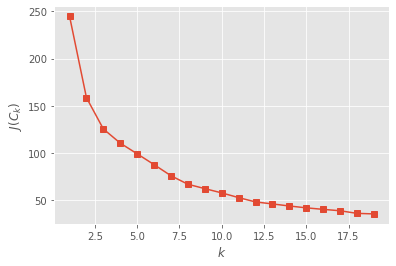

In [9]:
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [10]:
#Возьмем 3 кластера, т.к. после третьего падение перестает быть резким

**Кластеризуйте данные на оптимальном количестве кластеров из предыдущего пункта**

In [12]:
kmeanModel = KMeans(n_clusters=3)
model = kmeanModel.fit(df_scaled)

**Визуализируйте в виде точечной диаграммы все точки, каждый кластер окрасьте в свой цвет**

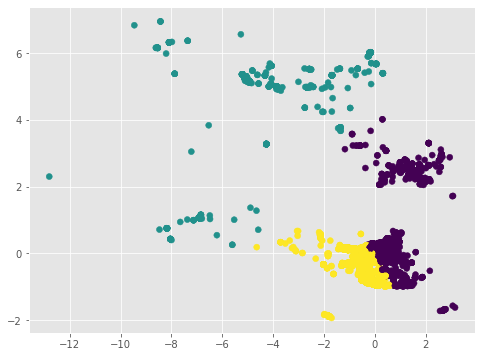

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(df_scaled[:,0], df_scaled[:,1], c=kmeanModel.labels_)


**Кластеризуйте агломеративной кластеризацией с таким же количеством кластеров, которое выглядит оптимальном при методе локтя**

In [14]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
A = cluster.fit(df_scaled)

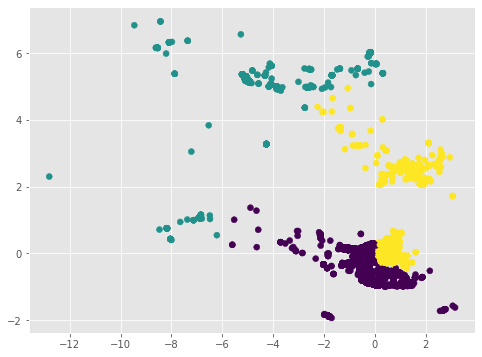

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(df_scaled[:,0], df_scaled[:,1], c=A.labels_)

**Сравните результаты кластеризации обоими алгоритмами: есть ли пересечения? Насколько сильные? Ответ на вопрос можно поддержать цифрами и/или картинками.**

Мы видим, что в моделях больше пересечений, чем расхождений. Например, кластер, обозначенный на первой модели фиолетовыми точками (на второй - желтыми) совпадает очень сильно.
Но в то же время есть разница между определениями тех, кто находится на границе верхнего и правого кластера (первая модель определила большую часть в зеленый кластер, а нижняя - в фиолетовый)
